In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import trange

from IPython.display import clear_output

In [2]:
import config
from datagen import gen_batch
from models.maxpool import Model

clear_output()

In [3]:
model_name = 'nopool'
model_path = f'saved_models/{model_name}/model'

In [4]:
model = Model(h=config.h, w=config.w)
saver = tf.train.Saver()

In [5]:
x, y = gen_batch(batch_size=8, fixed_size=False)
with tf.Session() as sess:
    saver.restore(sess, model_path)
    inference = sess.run(model.inference, feed_dict={
        model.x: x,
        model.y: y,
    })
inference.shape

INFO:tensorflow:Restoring parameters from saved_models/nopool/model


(8, 2)

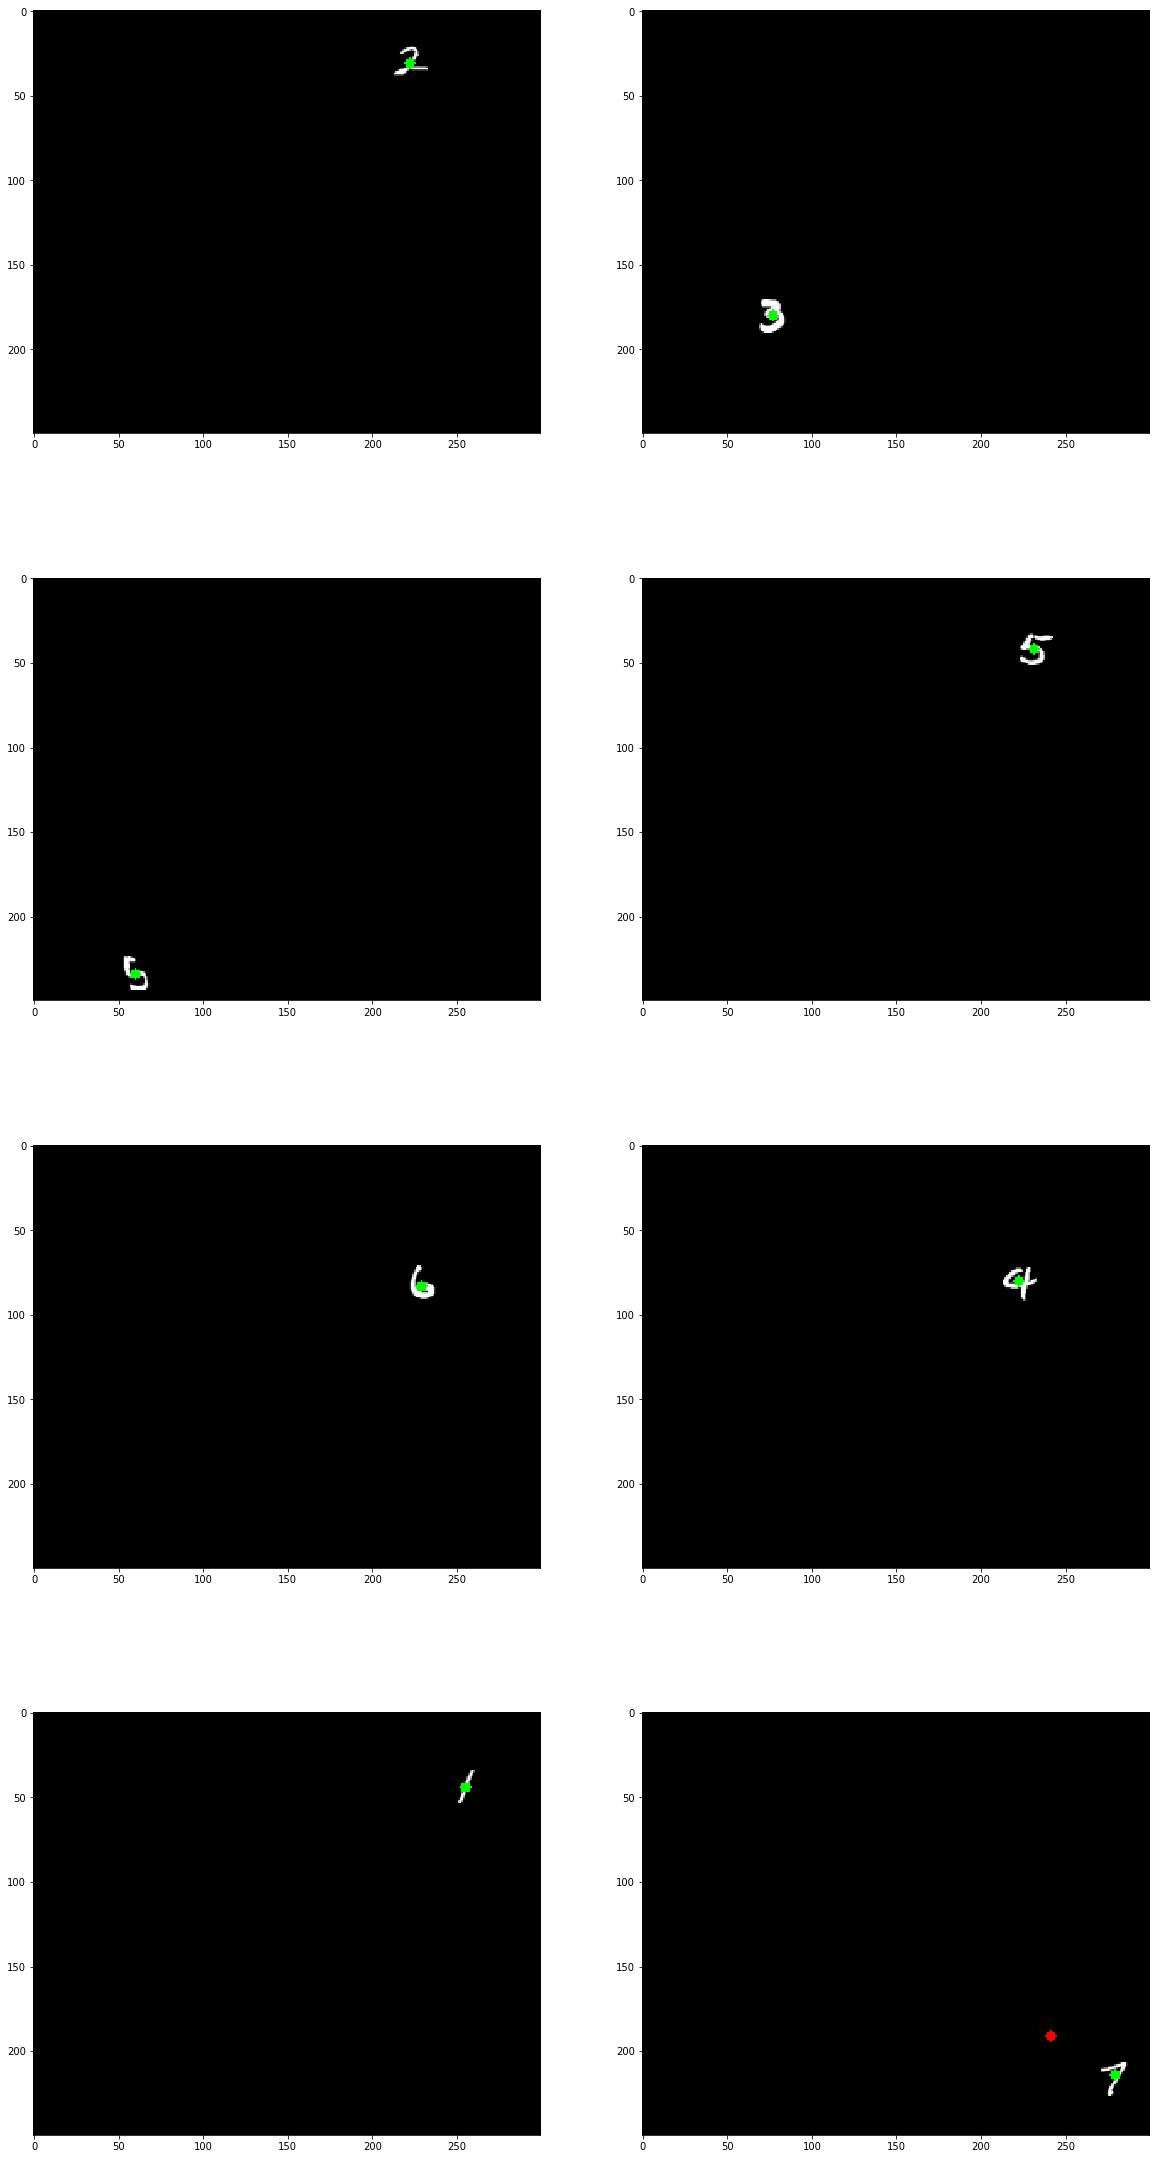

In [6]:
def visualize(image, true, pred):
    """
    image: float image [0, 1], shape [h, w, 1]
    true, false: [x, y], values [0, 1]
    """
    h, w = image.shape[:2]
    true_x, true_y = int(true[0]*w), int(true[1]*h)
    pred_x, pred_y = int(pred[0]*w), int(pred[1]*h)
    
    image = np.squeeze(image, axis=-1)  # remove last channel
    image = (image * 255).astype(np.uint8)  # convert to 8-bit image
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # convert to BGR
    
    cv2.circle(image, (true_x, true_y), 3, (0, 255, 0), -1)
    cv2.circle(image, (pred_x, pred_y), 3, (255, 0, 0), -1)
    return image

plt.figure(figsize=(20, 40))
for i in range(8):
    out = visualize(x[i], y[i], inference[i])
    plt.subplot(4, 2, i+1)
    plt.imshow(out)
plt.show();